In [35]:
import datetime as dt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc_file('../../repos/lhcb-matplotlibrc/matplotlibrc')

from glob import glob

In [2]:
def get_time(path):
    with open(path, 'r') as infile:
        for line in infile:
            if "Difference" in line:
                return line.strip().split("Difference:",1)[1]

In [36]:
time_format = '%M:%S.%f'
files = glob("../results/*/*/files-*/cores-*/*_files-*_cores-*_trial-*.txt")

dfs = []
for n, file in enumerate(files):
    tool = file.split("/", 3)[2]
    time = get_time(file)
    _, file = file.replace(".txt","").replace("_","-").rsplit("/", 1)
    config, _, num_files, _, cores, _, trial = file.split("-")
    
    dfs += [
        pd.DataFrame.from_dict(
            {str(n): [tool, config, int(num_files), int(cores), trial, dt.datetime.strptime(time.split(":",1)[1], time_format)]},
            orient="index",
            columns=["tool", "config", "num_files", "cores", "trial", "time"]
        )   
    ]
total_df = pd.concat(dfs)
uproot_df = total_df[total_df.tool == "uproot"]
rdataframe_df = total_df[total_df.tool == "rdataframe"]

# 1D studies

## Number of files

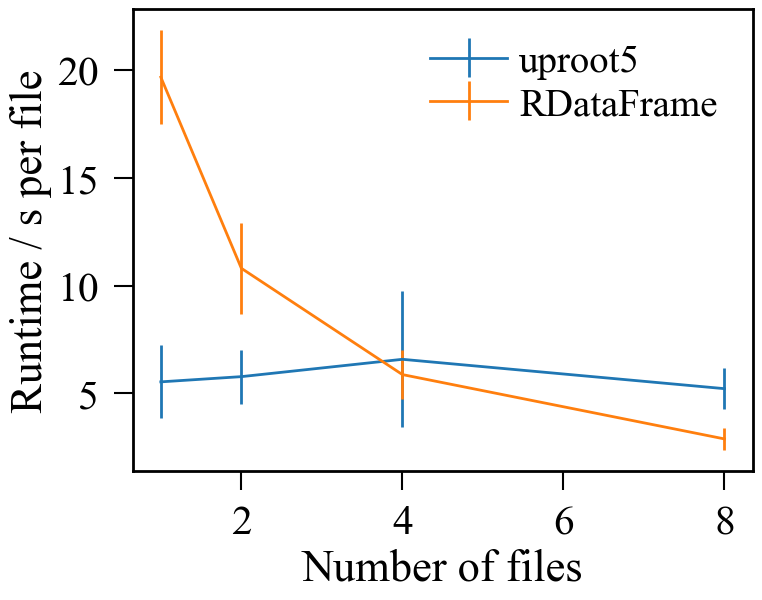

In [37]:
cores = 4
config = "simple"

plt.figure(figsize=(8,6))
for df, tool_label in zip((uproot_df, rdataframe_df), ("uproot5", "RDataFrame")):
    xvals = []
    yvals = []
    yerrs = []
    for num_files in sorted(pd.unique(df.num_files)):
        dt_times = df[(df.config == config) & (df.num_files == num_files) & (df.cores == cores)].time
        times = [60 * dt_time.minute + dt_time.second + 1e-6 * dt_time.microsecond for dt_time in dt_times]
        xvals += [num_files]
        yvals += [np.mean(times)/num_files]
        yerrs += [np.std(times)/num_files]
    plt.errorbar(xvals, yvals, yerrs, label=tool_label)
plt.xlabel("Number of files")
plt.ylabel("Runtime / s per file")
plt.legend()
plt.show()

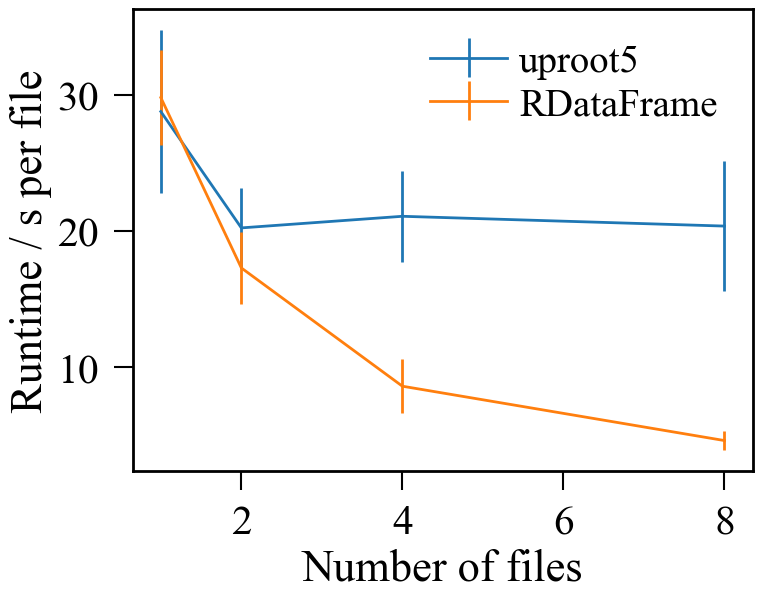

In [38]:
cores = 4
config = "complex"

plt.figure(figsize=(8,6))
for df, tool_label in zip((uproot_df, rdataframe_df), ("uproot5", "RDataFrame")):
    xvals = []
    yvals = []
    yerrs = []
    for num_files in sorted(pd.unique(df.num_files)):
        dt_times = df[(df.config == config) & (df.num_files == num_files) & (df.cores == cores)].time
        times = [60 * dt_time.minute + dt_time.second + 1e-6 * dt_time.microsecond for dt_time in dt_times]
        xvals += [num_files]
        yvals += [np.mean(times)/num_files]
        yerrs += [np.std(times)/num_files]
    plt.errorbar(xvals, yvals, yerrs, label=tool_label)
plt.xlabel("Number of files")
plt.ylabel("Runtime / s per file")
plt.legend()
plt.show()

## Number of cores

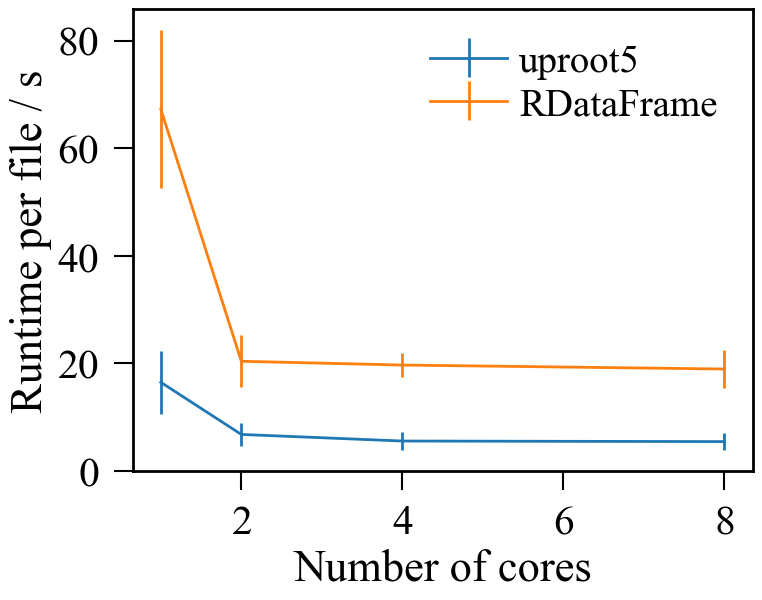

In [39]:
num_files = 1
config = "simple"

plt.figure(figsize=(8,6))
for df, tool_label in zip((uproot_df, rdataframe_df), ("uproot5", "RDataFrame")):
    xvals = []
    yvals = []
    yerrs = []
    for cores in sorted(pd.unique(df.cores)):
        dt_times = df[(df.config == config) & (df.num_files == num_files) & (df.cores == cores)].time
        times = [60 * dt_time.minute + dt_time.second + 1e-6 * dt_time.microsecond for dt_time in dt_times]
        xvals += [cores]
        yvals += [np.mean(times) / num_files]
        yerrs += [np.std(times) / num_files]
    plt.errorbar(xvals, yvals, yerrs, label=tool_label)
plt.xlabel("Number of cores")
plt.ylabel("Runtime per file / s")
plt.legend()
plt.show()

## Both together

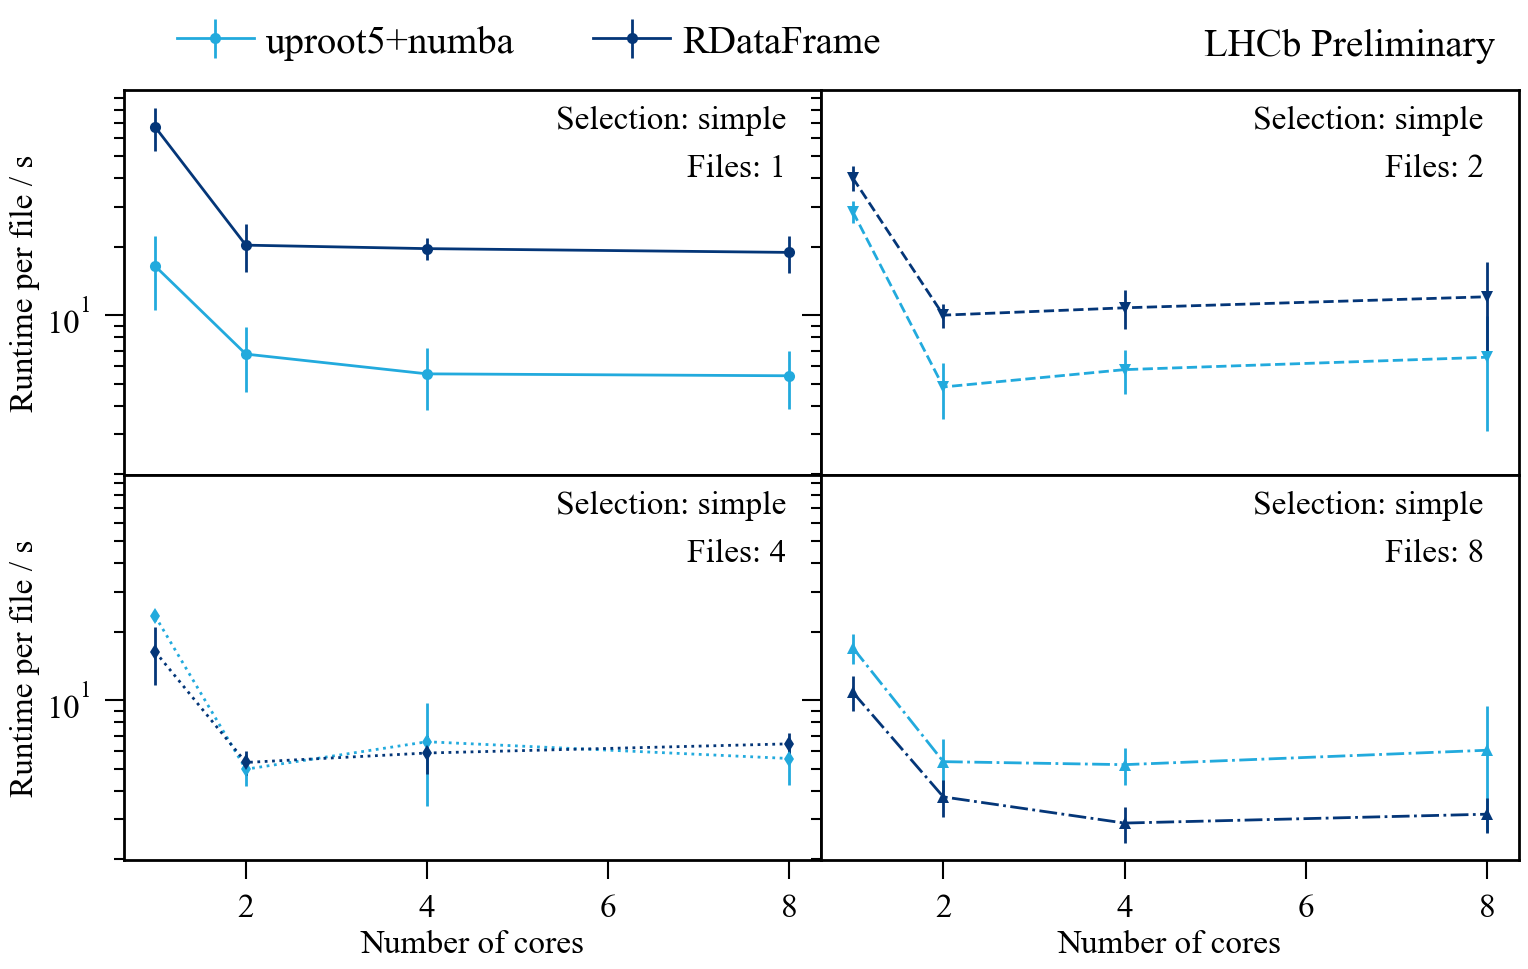

In [79]:
config = "simple"
fig, axs = plt.subplots(2, 2, figsize=(18,10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()
for df, tool_label, color in zip((uproot_df, rdataframe_df), ("uproot5+numba", "RDataFrame"), ("#22AADD", "#043678")):
    for ax, num_files, marker, linestyle in zip(axs.flatten(), sorted(pd.unique(df.num_files)), ("o", "v", "d", "^"), ("solid", "dashed", "dotted", "dashdot")):
        xvals = []
        yvals = []
        yerrs = []
        for cores in sorted(pd.unique(df.cores)):
            dt_times = df[(df.config == config) & (df.num_files == num_files) & (df.cores == cores)].time
            times = [60 * dt_time.minute + dt_time.second + 1e-6 * dt_time.microsecond for dt_time in dt_times]
            xvals += [cores]
            yvals += [np.mean(times)/num_files]
            yerrs += [np.std(times)/num_files]
        ax.errorbar(xvals, yvals, yerrs, label=tool_label if num_files == 1 else "",
                    marker=marker, ls=linestyle, color=color)
        if tool_label == "RDataFrame":
            ax.annotate(f"Selection: simple", (0.95, 0.9), xycoords="axes fraction", ha="right", size=24)
            ax.annotate(f"Files: {num_files}", (0.95, 0.775), xycoords="axes fraction", ha="right", size=24)
        ax.tick_params(axis='x', labelsize=24)
        ax.tick_params(axis='y', labelsize=24)
#ax.set_xscale("log")
ax.set_yscale("log")
[ax.set_xlabel("Number of cores", size=24) for ax in axs[1]]
[ax.set_ylabel("Runtime per file / s", size=24) for ax in axs[:,0]]
fig.legend(loc='lower center', bbox_to_anchor=(0.35, 0.875),
              ncol=2, fancybox=True)
fig.text(0.725, 0.915, 'LHCb Preliminary', {'size': 28})
plt.savefig("plots/benchmark/simple.png")
plt.savefig("plots/benchmark/simple.pdf")
plt.show()

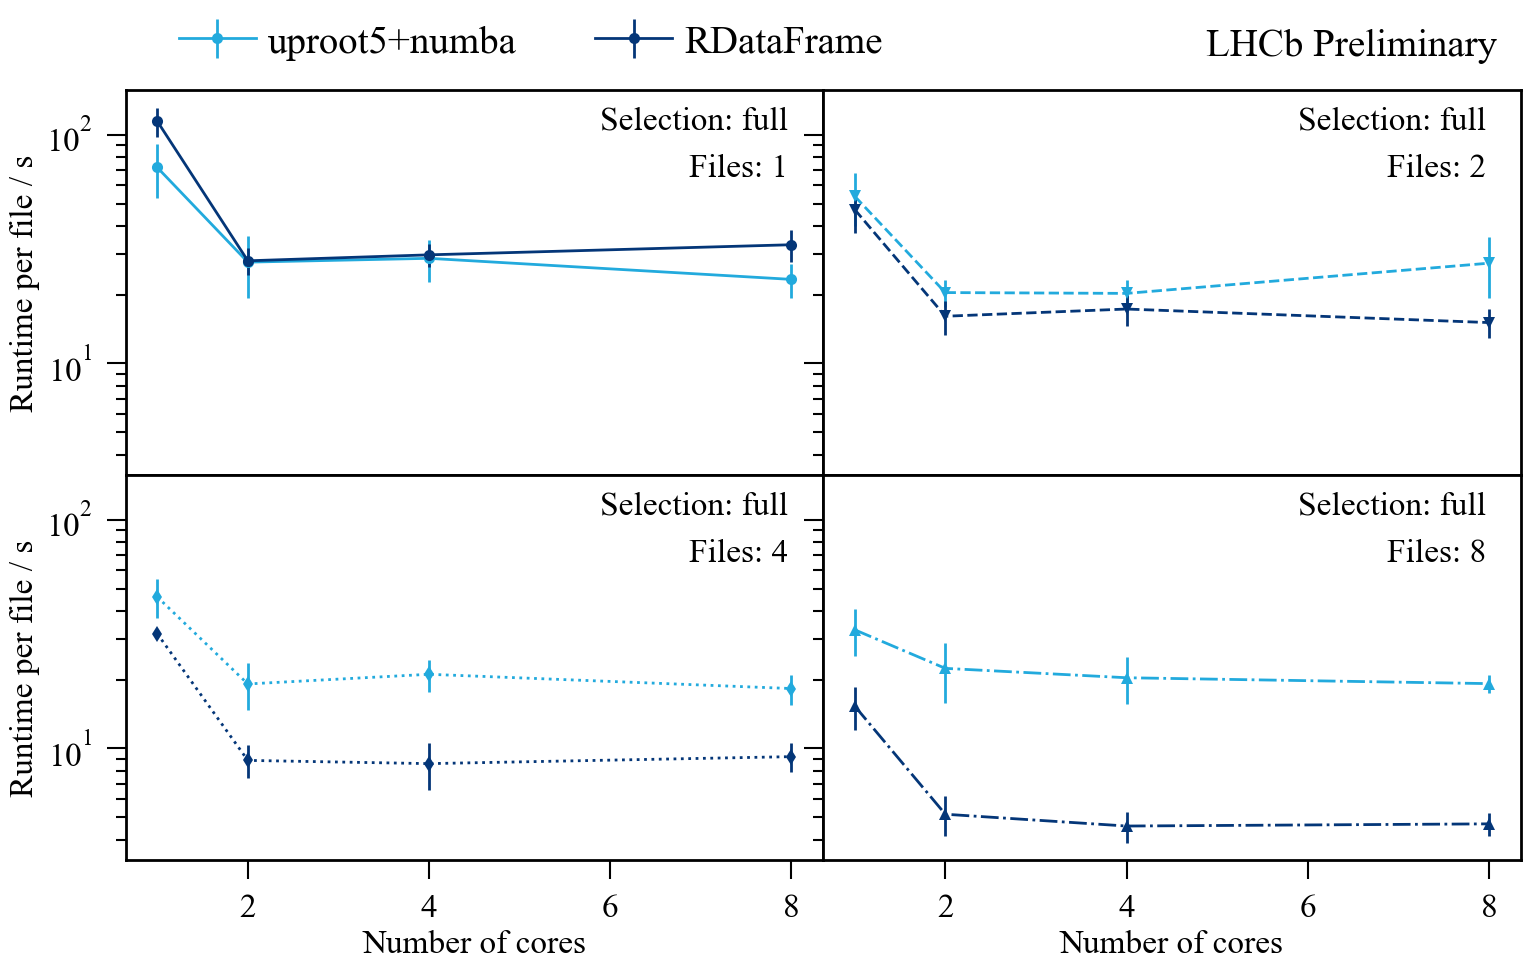

In [78]:

config = "complex"
fig, axs = plt.subplots(2, 2, figsize=(18,10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()
for df, tool_label, color in zip((uproot_df, rdataframe_df), ("uproot5+numba", "RDataFrame"), ("#22AADD", "#043678")):
    for ax, num_files, marker, linestyle in zip(axs.flatten(), sorted(pd.unique(df.num_files)), ("o", "v", "d", "^"), ("solid", "dashed", "dotted", "dashdot")):
        xvals = []
        yvals = []
        yerrs = []
        for cores in sorted(pd.unique(df.cores)):
            dt_times = df[(df.config == config) & (df.num_files == num_files) & (df.cores == cores)].time
            times = [60 * dt_time.minute + dt_time.second + 1e-6 * dt_time.microsecond for dt_time in dt_times]
            xvals += [cores]
            yvals += [np.mean(times)/num_files]
            yerrs += [np.std(times)/num_files]
        ax.errorbar(xvals, yvals, yerrs, label=tool_label if num_files == 1 else "",
                    marker=marker, ls=linestyle, color=color)
        if tool_label == "RDataFrame":
            ax.annotate(f"Selection: full", (0.95, 0.9), xycoords="axes fraction", ha="right", size=24)
            ax.annotate(f"Files: {num_files}", (0.95, 0.775), xycoords="axes fraction", ha="right", size=24)
        ax.tick_params(axis='x', labelsize=24)
        ax.tick_params(axis='y', labelsize=24)
#ax.set_xscale("log")
ax.set_yscale("log")
[ax.set_xlabel("Number of cores", size=24) for ax in axs[1]]
[ax.set_ylabel("Runtime per file / s", size=24) for ax in axs[:,0]]
fig.legend(loc='lower center', bbox_to_anchor=(0.35, 0.875),
              ncol=2, fancybox=True)
fig.text(0.725, 0.915, 'LHCb Preliminary', {'size': 28})
plt.savefig("plots/benchmark/complex.png")
plt.savefig("plots/benchmark/complex.pdf")
plt.show()

# 2D studies

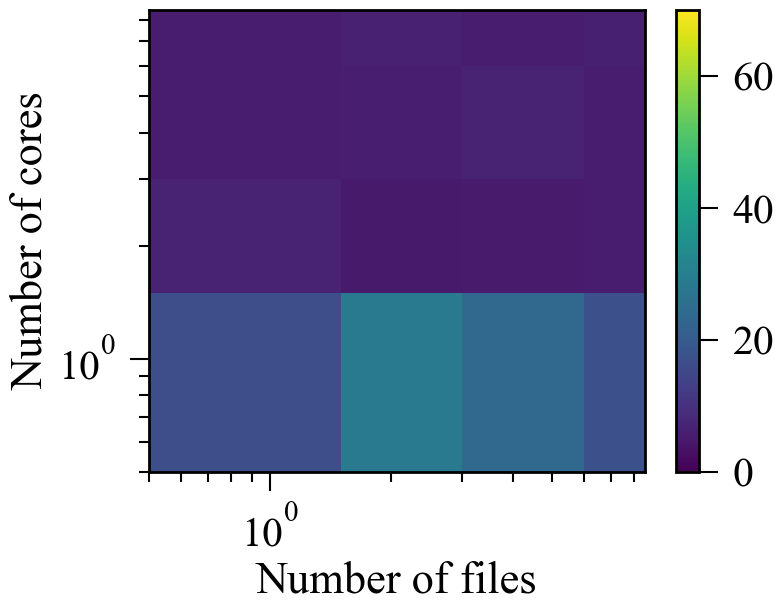

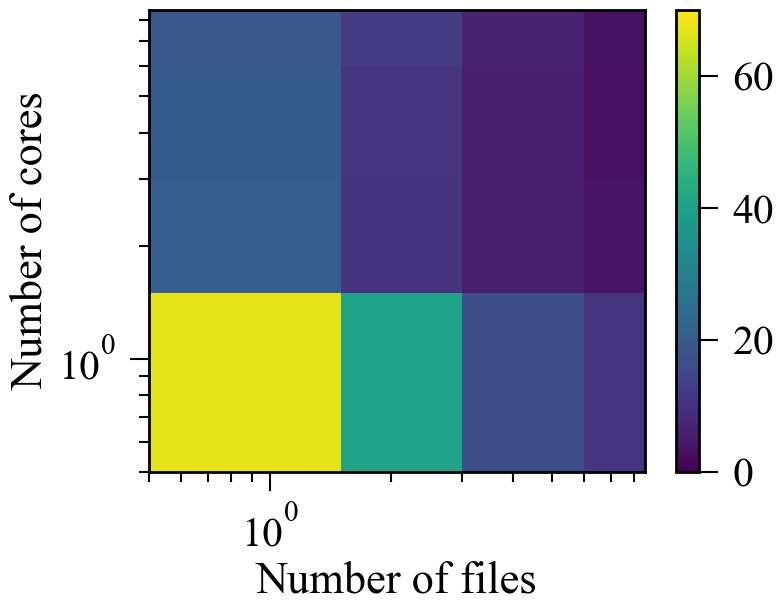

In [42]:
num_files = 4
config = "simple"

for df, tool_label in zip((uproot_df, rdataframe_df), ("uproot5", "RDataFrame")):

    plt.figure(figsize=(8,6))
    xvals, yvals = np.meshgrid(sorted(pd.unique(df.num_files)), sorted(pd.unique(df.cores)))
    zvals = np.zeros((len(pd.unique(df.cores)),len(pd.unique(df.num_files))))
    for i, num_files in enumerate(sorted(pd.unique(df.num_files))):
        for j, cores in enumerate(sorted(pd.unique(df.cores))):
            dt_times = df[(df.config == config) & (df.num_files == num_files) & (df.cores == cores)].time
            times = [60 * dt_time.minute + dt_time.second + 1e-6 * dt_time.microsecond for dt_time in dt_times]
            zvals[j,i] = np.mean(times) / num_files
    plt.pcolormesh(xvals, yvals, zvals,
                   vmin=0, vmax=70, label=tool_label)
    plt.colorbar()
    plt.clim()

    plt.xscale("log")
    plt.xlim(0.5, max(pd.unique(df.num_files))+0.5)
    plt.xlabel("Number of files")

    plt.yscale("log")
    plt.ylim(0.5, max(pd.unique(df.cores))+0.5)
    plt.ylabel("Number of cores")

    plt.show()

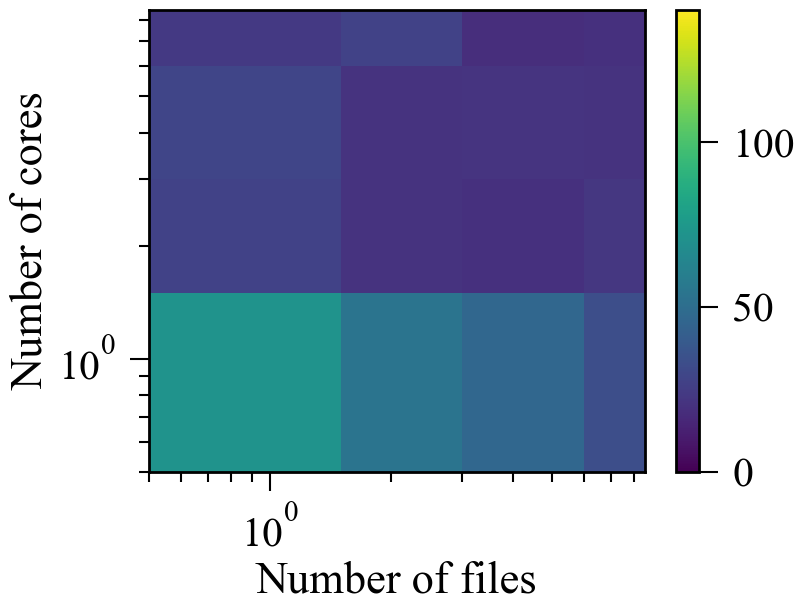

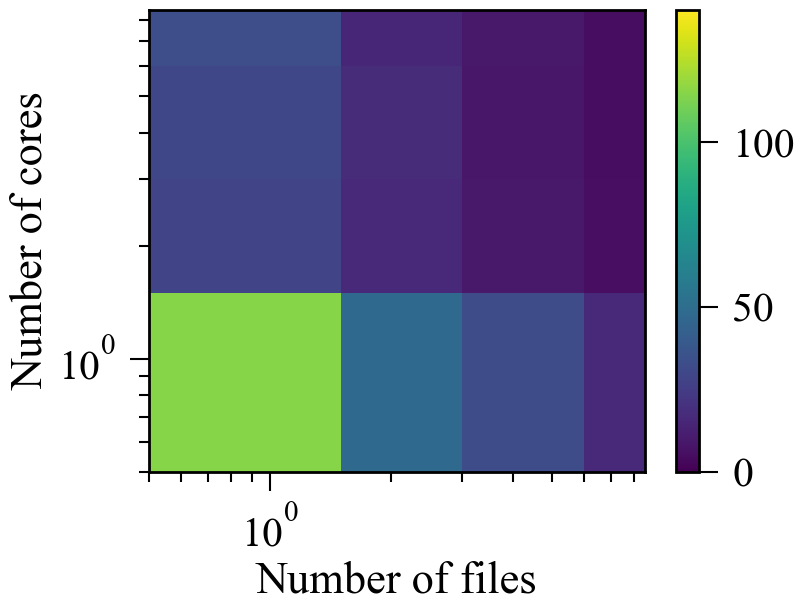

In [43]:
config = "complex"

for df, tool_label in zip((uproot_df, rdataframe_df), ("uproot5", "RDataFrame")):

    plt.figure(figsize=(8,6))
    xvals, yvals = np.meshgrid(sorted(pd.unique(df.num_files)), sorted(pd.unique(df.cores)))
    zvals = np.zeros((len(pd.unique(df.cores)),len(pd.unique(df.num_files))))
    for i, num_files in enumerate(sorted(pd.unique(df.num_files))):
        for j, cores in enumerate(sorted(pd.unique(df.cores))):
            dt_times = df[(df.config == config) & (df.num_files == num_files) & (df.cores == cores)].time
            times = [60 * dt_time.minute + dt_time.second + 1e-6 * dt_time.microsecond for dt_time in dt_times]
            zvals[j,i] = np.mean(times) / num_files
    plt.pcolormesh(xvals, yvals, zvals,
                   vmin=0, vmax=140, label=tool_label)
    plt.colorbar()
    plt.clim()

    plt.xscale("log")
    plt.xlim(0.5, max(pd.unique(df.num_files))+0.5)
    plt.xlabel("Number of files")

    plt.yscale("log")
    plt.ylim(0.5, max(pd.unique(df.cores))+0.5)
    plt.ylabel("Number of cores")

    plt.show()